In [1]:
import numpy as np
import pandas as pd

In [2]:
base = pd.read_excel('C:/Users/thais/OneDrive/Documentos/Diretório theuzas/regressão/comissao.xlsx')

In [3]:
base.dtypes

quantidade    int64
comissao      int64
dtype: object

In [4]:
base = base.astype({'comissao': float}) # convertendo para float para que tenha casas decimais 

In [5]:
# valores missings 

base.isnull().sum()   # sem valores missing

quantidade    0
comissao      0
dtype: int64

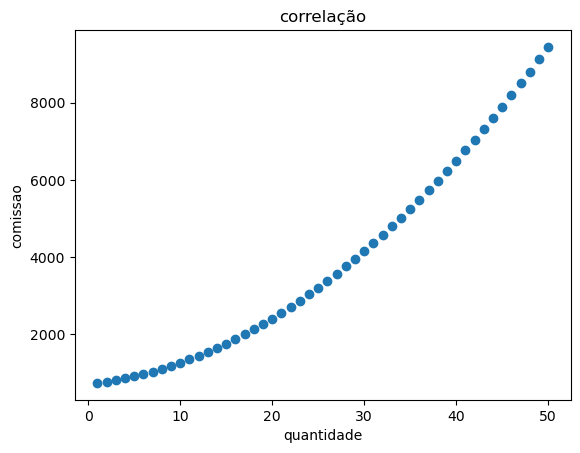

In [6]:
# gráficos

import matplotlib.pyplot as plt

plt.scatter(base.quantidade, base.comissao)
plt.title('correlação')
plt.xlabel('quantidade')
plt.ylabel('comissao')
plt.grid(False)
plt.show()

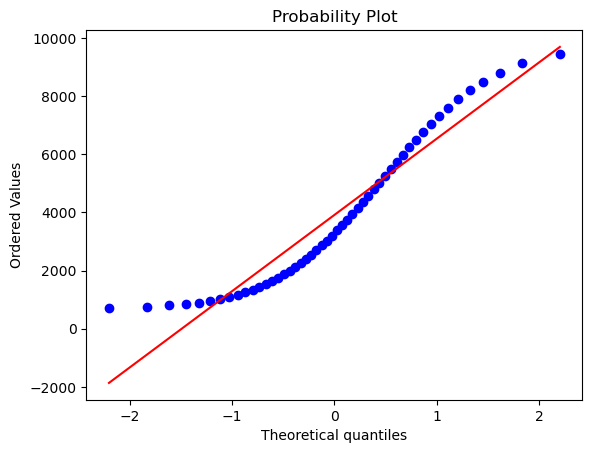

In [7]:
# analisar normalidade
# por qqplot 

import scipy.stats as stats
stats.probplot(base['comissao'], dist='norm', plot=plt)
plt.show()

# para ser normal, os valores azuis devem estar em cima da reta vermelha

In [8]:
# teste de shapiro

stats.shapiro(base.comissao)

ShapiroResult(statistic=0.9124540090560913, pvalue=0.0012719858204945922)

# vimos que a distribuição é não normal

como é não normal, temos que analisá-la com técnicas apropriadas para não normal

correlação linear:

pearson(normal)

spearman(não normal)

kendall(não normal com amostra pequena)

In [9]:
# analisar a correlação linear

stats.spearmanr(base.quantidade, base.comissao)

# o primeiro valor é o coeficiente de correlação (r) e o outro é o p valor. Para aceitar a correlação deve ser menor que 0,05

SignificanceResult(statistic=0.9999999999999999, pvalue=0.0)

# correlação linear


In [10]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


In [11]:
reglin = smf.ols('comissao~quantidade', data=base).fit()

In [12]:
print(reglin.summary())

                            OLS Regression Results                            
Dep. Variable:               comissao   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1016.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           5.98e-34
Time:                        08:30:20   Log-Likelihood:                -387.21
No. Observations:                  50   AIC:                             778.4
Df Residuals:                      48   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -626.0000    163.662     -3.825      0.0

nessa hora é questão de interpretação. Podemos ver que as estatísticas e os R's mostram que o modelo foi bem ajustado. mas será isso mesmo? 

se nós montarmos a equação vemos que o intercept é -626, enquanto o coeficiente para a quantidade é 178. Para o vendendor ter comissão ele tem que vender no mínimo 5? Caso contrário, é descontado do seu salário? 

Não faz sentido!! Temos que nos atentar.

C:\Users\thais\AppData\Local\Temp\ipykernel_8932\2529363022.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*reglin.params[1] + reglin.params[0], color='red')


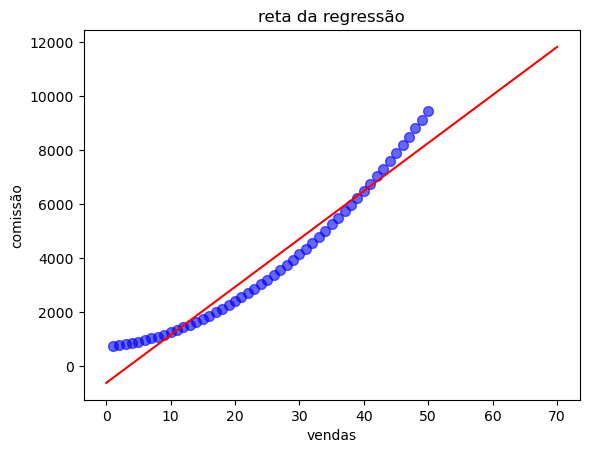

In [13]:
# olhando no gráfico 

plt.scatter(y=base.comissao, x=base.quantidade, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0,70)
plt.plot(X_plot, X_plot*reglin.params[1] + reglin.params[0], color='red')
plt.title('reta da regressão')
plt.ylabel('comissão')
plt.xlabel('vendas')
plt.show()

ta mto feio esse ajuste! O modelo sofreu overfitting. Pois ele se ajustou bem aos dados do modelo, mas vai ser ruim para futuros dados

regressão polinomial com numpy 

In [15]:
modelo2 = np.poly1d(np.polyfit(base.quantidade, base.comissao, 2))

In [16]:
y2 = modelo2(base.quantidade)
y2

array([ 728.,  762.,  802.,  848.,  900.,  958., 1022., 1092., 1168.,
       1250., 1338., 1432., 1532., 1638., 1750., 1868., 1992., 2122.,
       2258., 2400., 2548., 2702., 2862., 3028., 3200., 3378., 3562.,
       3752., 3948., 4150., 4358., 4572., 4792., 5018., 5250., 5488.,
       5732., 5982., 6238., 6500., 6768., 7042., 7322., 7608., 7900.,
       8198., 8502., 8812., 9128., 9450.])

In [18]:
modelo2.coef

# o primeiro é o q multiplica o x², depois o x, depois o intercepto

array([  3.,  25., 700.])

_____ 

com SKLEARN

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [20]:
# pré processamento

pre_process = PolynomialFeatures(degree=2)

In [21]:
x = base[['quantidade']]
y = base.comissao

In [22]:
x_polu = pre_process.fit_transform(x)

In [23]:
modelo_sk = LinearRegression()
modelo_sk.fit(x_polu, y)

LinearRegression()

In [24]:
y_pred = modelo_sk.predict(x_polu)


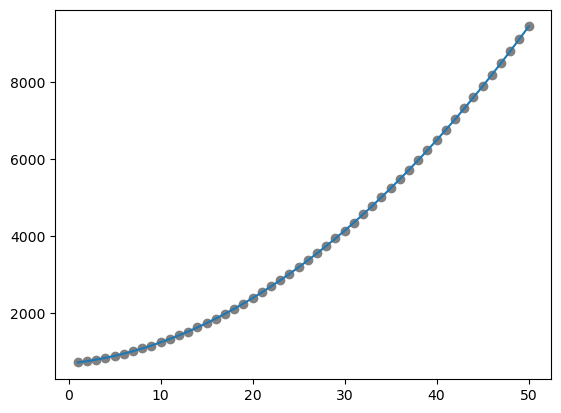

In [25]:
plt.scatter(x, y, c ='gray')
plt.plot(x, y_pred)

In [26]:
modelo_sk.intercept_

700.0000000000077

In [27]:
# avaliação do modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error

# mse
mean_squared_error(y, y_pred)

1.240538274282261e-23

In [28]:
# mae

mean_absolute_error(y, y_pred)

3.0445335141848774e-12